In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load
df = pd.read_csv('https://raw.githubusercontent.com/Rohanrathod7/my-ds-projects/main/07_time_functions/Flight_time_analysis/Data/combined.csv')
print("Loaded rows:", len(df))
df.head()


Loaded rows: 22000


,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,1987,11,28,6,2042.0,2025,2105.0,2053,PI,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1,1987,10,22,4,1805.0,1800,1933.0,1905,HP,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2,1987,11,19,4,657.0,655,821.0,804,PI,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,3,1987,11,23,1,1848.0,1835,1944.0,1920,DL,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,4,1987,11,25,3,703.0,655,828.0,821,AA,...,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [16]:
# Combine Year, Month, and DayofMonth into a single datetime column
df['FL_DATE'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-' + df['DayofMonth'].astype(str), errors='coerce')

# Basic datetime features
df['Year'] = df['FL_DATE'].dt.year
df['Month'] = df['FL_DATE'].dt.month
df['Weekday'] = df['FL_DATE'].dt.day_name()

df[['Year','Month','Weekday']].drop_duplicates().head()

,Year,Month,Weekday
0,1987,11,Saturday
1,1987,10,Thursday
2,1987,11,Thursday
3,1987,11,Monday
4,1987,11,Wednesday


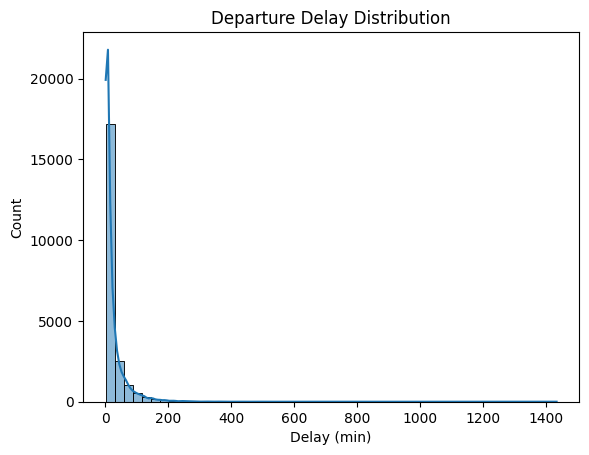

In [18]:
# Delay distribution
sns.histplot(df['DepDelay'], bins=50, kde=True)
plt.title("Departure Delay Distribution")
plt.xlabel("Delay (min)")
plt.show()

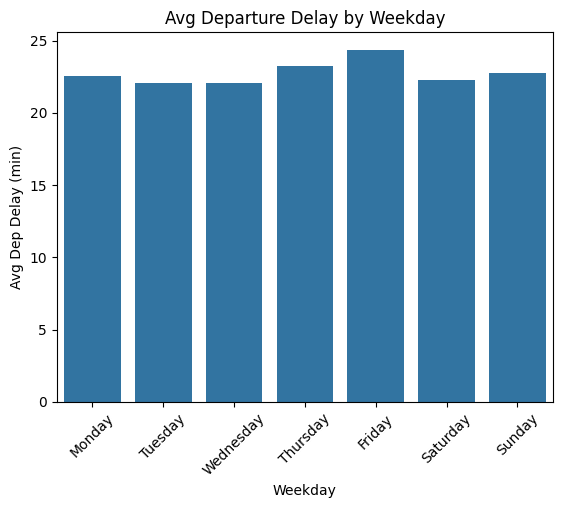

In [20]:
# Weekly patterns
weekly = df.groupby('Weekday')['DepDelay'].mean().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
sns.barplot(x=weekly.index, y=weekly.values)
plt.xticks(rotation=45)
plt.ylabel("Avg Dep Delay (min)")
plt.title("Avg Departure Delay by Weekday")
plt.show()

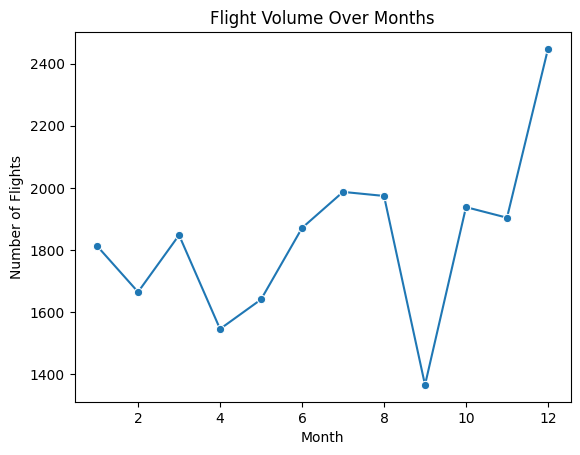

In [21]:
# Monthly flight volume pattern
month_counts = df['Month'].value_counts().sort_index()
sns.lineplot(x=month_counts.index, y=month_counts.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.title('Flight Volume Over Months')
plt.show()


In [23]:
# Suppose we map origins to timezones (if known), e.g.:
tz_map = {'JFK':'America/New_York', 'LAX':'America/Los_Angeles'}
df['origin_tz'] = df['Origin'].map(tz_map)

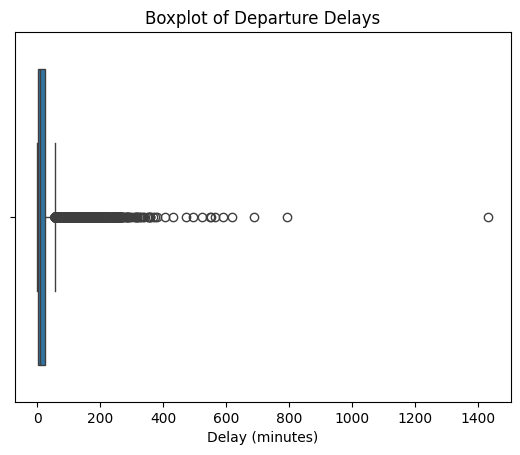

count    22000.000000
mean        22.820773
std         38.249274
min          1.000000
25%          4.000000
50%         10.000000
75%         25.000000
max       1433.000000
Name: DepDelay, dtype: float64
Flights with >1hr delay: 2127


In [29]:
sns.boxplot(x=df['DepDelay'])
plt.title('Boxplot of Departure Delays')
plt.xlabel('Delay (minutes)')
plt.show()

print(df['DepDelay'].describe())
print("Flights with >1hr delay:", (df['DepDelay'] > 60).sum())

**Reasoning**:
Filter the data for shorter delays and create a boxplot to visualize their distribution.



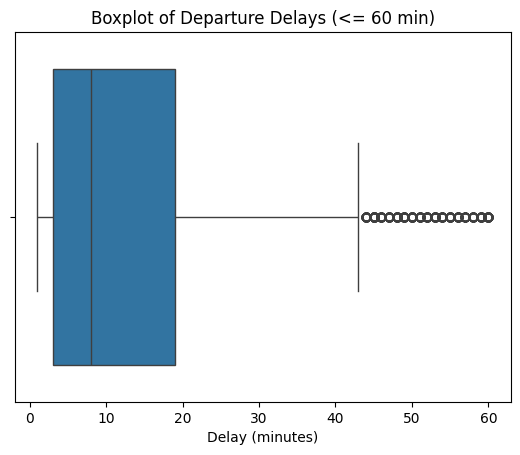

In [26]:
# Filter for shorter delays
df_short_delays = df[df['DepDelay'] <= 60].copy()

# Create boxplot for shorter delays
sns.boxplot(x=df_short_delays['DepDelay'])
plt.title('Boxplot of Departure Delays (<= 60 min)')
plt.xlabel('Delay (minutes)')
plt.show()

**Reasoning**:
Generate a violin plot using the `df_short_delays` DataFrame to visualize the distribution of shorter delays.



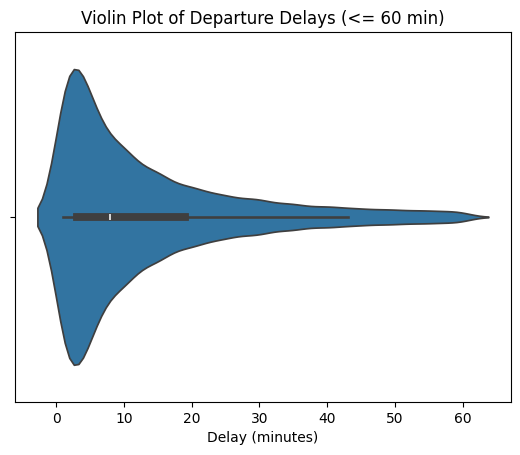

In [27]:
# Create a violin plot for shorter delays
sns.violinplot(x=df_short_delays['DepDelay'])
plt.title("Violin Plot of Departure Delays (<= 60 min)")
plt.xlabel("Delay (minutes)")
plt.show()

**Reasoning**:
Create a histogram of the `DepDelay` column from the `df_short_delays` DataFrame with adjusted bins, title, and x-axis label.



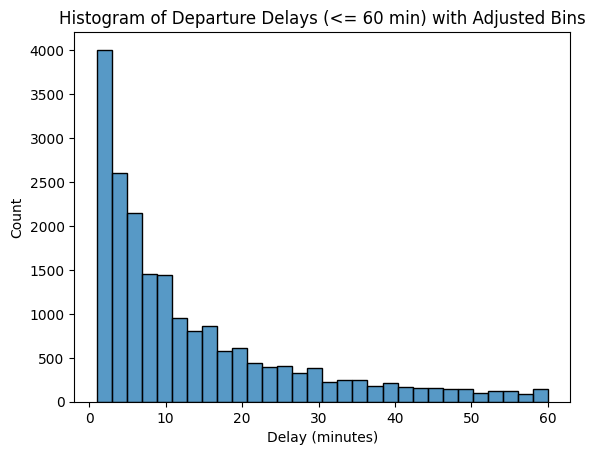

In [28]:
sns.histplot(df_short_delays['DepDelay'], bins=30, kde=False) # Experiment with bins, e.g., 30
plt.title("Histogram of Departure Delays (<= 60 min) with Adjusted Bins")
plt.xlabel("Delay (minutes)")
plt.show()

## Summary:

### Data Analysis Key Findings

*   A boxplot was created to visualize departure delays less than or equal to 60 minutes, showing the distribution for shorter delays.
*   A violin plot of departure delays less than or equal to 60 minutes was generated, providing insights into the density of data at different delay values.
*   A histogram with 30 bins was created for departure delays less than or equal to 60 minutes, offering an alternative view of the distribution.

### Insights or Next Steps

*   The visualizations indicate that the majority of flights experience relatively short delays, with a high density of flights having delays close to zero minutes.
*   Future analysis could explore the causes of these shorter delays and investigate if specific factors contribute more significantly to delays within the 0-60 minute range.


In [31]:
airport_delays = df.groupby('Origin')['DepDelay'].mean().sort_values(ascending=False).head(10)

In [34]:
df['Hour'] = pd.to_datetime(df['DepTime'], format='%H%M', errors='coerce').dt.hour
hourly_delays = df.groupby('Hour')['DepDelay'].mean()

In [ ]:
carrier_perf = df.groupby('CARRIER')['DEP_DELAY'].mean().sort_values()
